In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
class Arm:
    def __init__(self, p):
        self.p = p

    def pull(self):
        return np.random.binomial(1, self.p)

class MultiBandit:
    def __init__(self, probs = [0.1, 0.2, 0.7, 0.5]):
        self.__arms = [Arm(p) for p in probs]
        self.__regret = 0
        self.__maxp = max(probs)

    def num_arms(self):
        return len(self.__arms)

    def pull(self, arm_num):
        reward = self.__arms[arm_num].pull()
        self.__regret += self.__maxp-self.__arms[arm_num].p
        return reward

    def regret(self):
        return self.__regret

In [18]:
class EpsilonGreedyAlgorithm:
    def __init__(self, num_arms, horizon, epsilon):
        # Initialize our algorithm
        self.num_arms = num_arms
        self.horizon = horizon
        self.epsilon = epsilon
        self.timestep = 0
        self.arm_pulls = np.zeros(num_arms)
        self.arm_rewards = np.zeros(num_arms)
        self.regrets = np.zeros(horizon)

    def give_best_arm(self):
        average_rewards=self.arm_rewards/self.arm_pulls
        return np.argmax(average_rewards)
        pass

    def select_arm(self):
        if np.random.random()<self.epsilon:
            return np.random.randint(self.num_arms)
        else:
            average_rewards=self.arm_rewards/self.arm_pulls
            return np.argmax(average_rewards)
        pass

    def run_algorithm(self, bandit):
        # This is the proper algorithm. Already completed
        for _ in range(self.horizon):
            arm_to_pull = self.select_arm()
            reward = bandit.pull(arm_to_pull)
            self.arm_pulls[arm_to_pull] += 1
            self.arm_rewards[arm_to_pull] += reward
            self.timestep += 1
            self.regrets[_] = bandit.regret()

    def plot(self):
        plt.plot(self.regrets)
        plt.xlabel('Timestep')
        plt.ylabel('Regret')
        plt.title('Regret vs Timestep')
        plt.show()
        pass

Total Regret after 500 timesteps: 45.199999999999974 with assumed best arm 2


/tmp/ipython-input-18-3031239472.py:21: RuntimeWarning: invalid value encountered in divide
  average_rewards=self.arm_rewards/self.arm_pulls


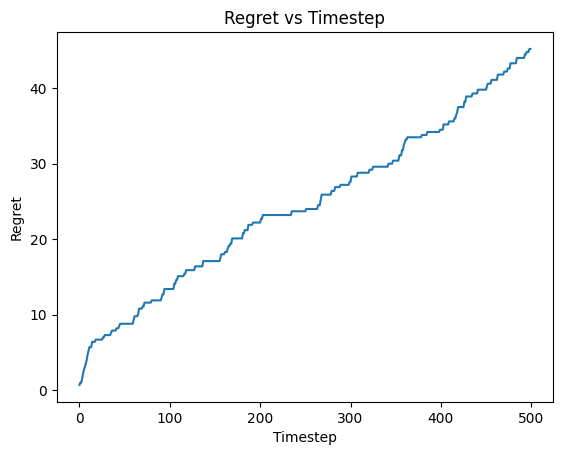

In [34]:
bandit = MultiBandit([0.1, 0.5, 0.8, 0.3, 0.4])

H = 500

algorithm = EpsilonGreedyAlgorithm(num_arms=bandit.num_arms(), horizon=H, epsilon=0.2)

algorithm.run_algorithm(bandit)

print(f"Total Regret after {H} timesteps: {bandit.regret()} with assumed best arm {algorithm.give_best_arm()}")
algorithm.plot()

In [20]:
class UCBAlgorithm:
    def __init__(self, num_arms, horizon):
        # Initialize our algorithm
        self.num_arms = num_arms
        self.horizon = horizon
        self.timestep = 0
        self.arm_pulls = np.zeros(num_arms)
        self.arm_rewards = np.zeros(num_arms)
        self.regrets = np.zeros(horizon)

    def give_best_arm(self):
        avg_rewards=self.arm_rewards/self.arm_pulls
        ucb=avg_rewards+np.sqrt(2*np.log(self.timestep+1)/self.arm_pulls)
        return np.argmax(ucb)
        pass

    def select_arm(self):
        self.timestep+=1
        for arm in range(self.num_arms):
            if self.arm_pulls[arm]==0:
                return arm
        avg_rewards=self.arm_rewards/self.arm_pulls
        ucb=avg_rewards+np.sqrt(2*np.log(self.timestep+1)/self.arm_pulls)
        return np.argmax(ucb)
        pass

    def run_algorithm(self, bandit):
        # This is the proper algorithm. Already completed
        for _ in range(self.horizon):
            arm_to_pull = self.select_arm()
            reward = bandit.pull(arm_to_pull)
            self.arm_pulls[arm_to_pull] += 1
            self.arm_rewards[arm_to_pull] += reward
            self.regrets[_] = bandit.regret()

    def plot(self):
        plt.plot(self.regrets)
        plt.xlabel('Timestep')
        plt.ylabel('Regret')
        plt.title('Regret vs Timestep')
        plt.show()
        pass

Total Regret after 500 timesteps: 55.099999999999916 with assumed best arm 2


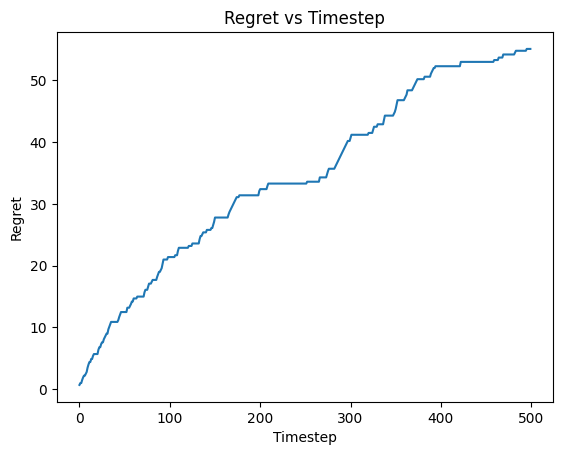

In [30]:
bandit = MultiBandit([0.1, 0.5, 0.8, 0.3, 0.4])

H = 500

algorithm = UCBAlgorithm(num_arms=bandit.num_arms(), horizon=H)

algorithm.run_algorithm(bandit)

print(f"Total Regret after {H} timesteps: {bandit.regret()} with assumed best arm {algorithm.give_best_arm()}")
algorithm.plot()

In [22]:
class ThompsonSamplingAlgorithm:
    def __init__(self, num_arms, horizon):
        # Initialize our algorithm
        self.num_arms = num_arms
        self.horizon = horizon
        self.successes=np.zeros(num_arms)
        self.failures=np.zeros(num_arms)
        self.regrets = np.zeros(horizon)

    def give_best_arm(self):
        estimates=self.successes/(self.successes+self.failures)
        return np.argmax(estimates)
        pass

    def select_arm(self):
        samples=np.random.beta(self.successes+1,self.failures+1)
        return np.argmax(samples)
        pass

    def run_algorithm(self, bandit):
        for _ in range(self.horizon):
            arm_to_pull = self.select_arm()
            reward = bandit.pull(arm_to_pull)
            if reward == 1:
                self.successes[arm_to_pull]+=1
            else:
                self.failures[arm_to_pull]+=1
            self.regrets[_] = bandit.regret()

    def plot(self):
        plt.plot(self.regrets)
        plt.xlabel('Timestep')
        plt.ylabel('Regret')
        plt.title('Regret vs Timestep')
        plt.show()
        pass

Total Regret after 500 timesteps: 12.400000000000002 with assumed best arm 2


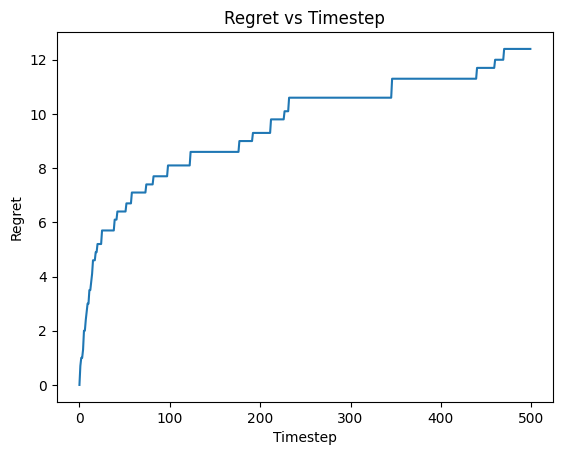

In [33]:
bandit = MultiBandit([0.1, 0.5, 0.8, 0.3, 0.4])

H = 500

algorithm = ThompsonSamplingAlgorithm(num_arms=bandit.num_arms(), horizon=H)

algorithm.run_algorithm(bandit)

print(f"Total Regret after {H} timesteps: {bandit.regret()} with assumed best arm {algorithm.give_best_arm()}")
algorithm.plot()